**bold text**# Heart_Disease_Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

folder_path = '/content/drive/My Drive/HDMxSp'
for filename in os.listdir(folder_path):
    print(filename)

ask-detrano
switzerland.data
processed.va.data
reprocessed.hungarian.data
WARNING
heart-disease.names
cleveland.data
new.data
hungarian.data
long-beach-va.data
Index
processed.hungarian.data
cleve.mod
processed.cleveland.data
processed.switzerland.data
bak
costs
data


In [4]:
import pandas as pd

data_path = folder_path + '/processed.cleveland.data'
df = pd.read_csv(data_path, header=None)  # No header row in the file

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Show the first few rows of the raw file
with open(data_path, 'r') as f:
    for _ in range(5):
        print(f.readline())

63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0

67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2

67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1

37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0

41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



In [6]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]
df.columns = column_names
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (in case any entries are still strings)
df = df.apply(pd.to_numeric, errors='coerce')

# Check missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


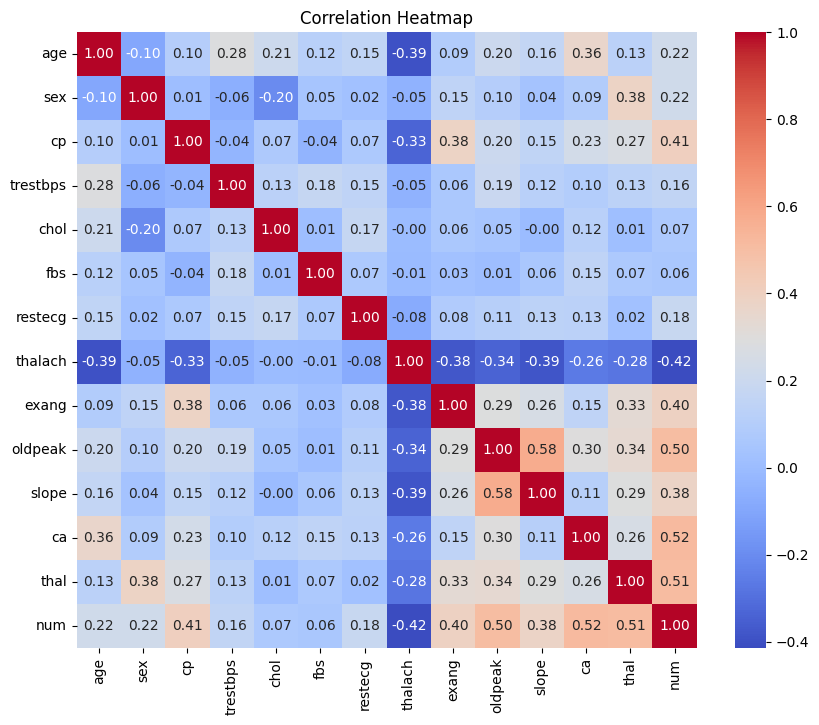

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (NaNs are ignored)
corr = df.corr()

# Display as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df = df.dropna()
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [10]:
print(df['num'].value_counts())

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


In [11]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print(df['num'].value_counts())

num
0    160
1    137
Name: count, dtype: int64


In [12]:
import os
os.makedirs('data', exist_ok=True)

In [13]:
data_folder_path = os.path.join('/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data', 'data')
os.makedirs(data_folder_path, exist_ok=True)
output_path = os.path.join(data_folder_path, 'processed_heart_disease.csv')
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to /drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/data/processed_heart_disease.csv
